# Data Visualization
#
# This notebook is used to visualize the data in the dataset.
#



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Read in data
df = pd.read_csv('genres_v2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
# display csv
df.head()


/var/folders/cc/c2h4hf8x1rq2d8qclpl8dwdw0000gn/T/ipykernel_11466/594568959.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('genres_v2.csv')


danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...            type  \
0          0.013400    0.0556   0.3890  ...  audio_features   
1          0.000000    0.1180   0.1240  ...  audio_features   
2          0.000004    0.3720   0.0391  ...  audio_features   
3          0.000000    0.1140   0.1750  ...  audio_features   
4          0.000000    0.1660   0.5910  ...  audio_features   

                       id                                   uri  \
0  2Vc6NJ9PW9gD9q343XFRKx  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  7pgJBLVz5VmnL7uGHmRj6p  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  0vSWgAlfpye0WCGeNmuNhy  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  0VSXnJqQkwuH2ei1nOQ1nu  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  4jCeguq9rMTlbMmPHuO7S3  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

   time_signature      genre                                      song_name  \
0               4  Dark Trap                            Mercury: Retrograde   
1               4  Dark Trap                                      Pathology   
2               4  Dark Trap                                       Symbiote   
3               3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4               4  Dark Trap                                          Venom   

  title  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  

[5 rows x 21 columns]

In [3]:
# import necessary libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import seaborn.objects as so


In [4]:
#isolate song metrics
subset = df[['danceability', 'energy', 'loudness', 'valence', 'acousticness', 'tempo', 'speechiness', 'instrumentalness', 'liveness']]

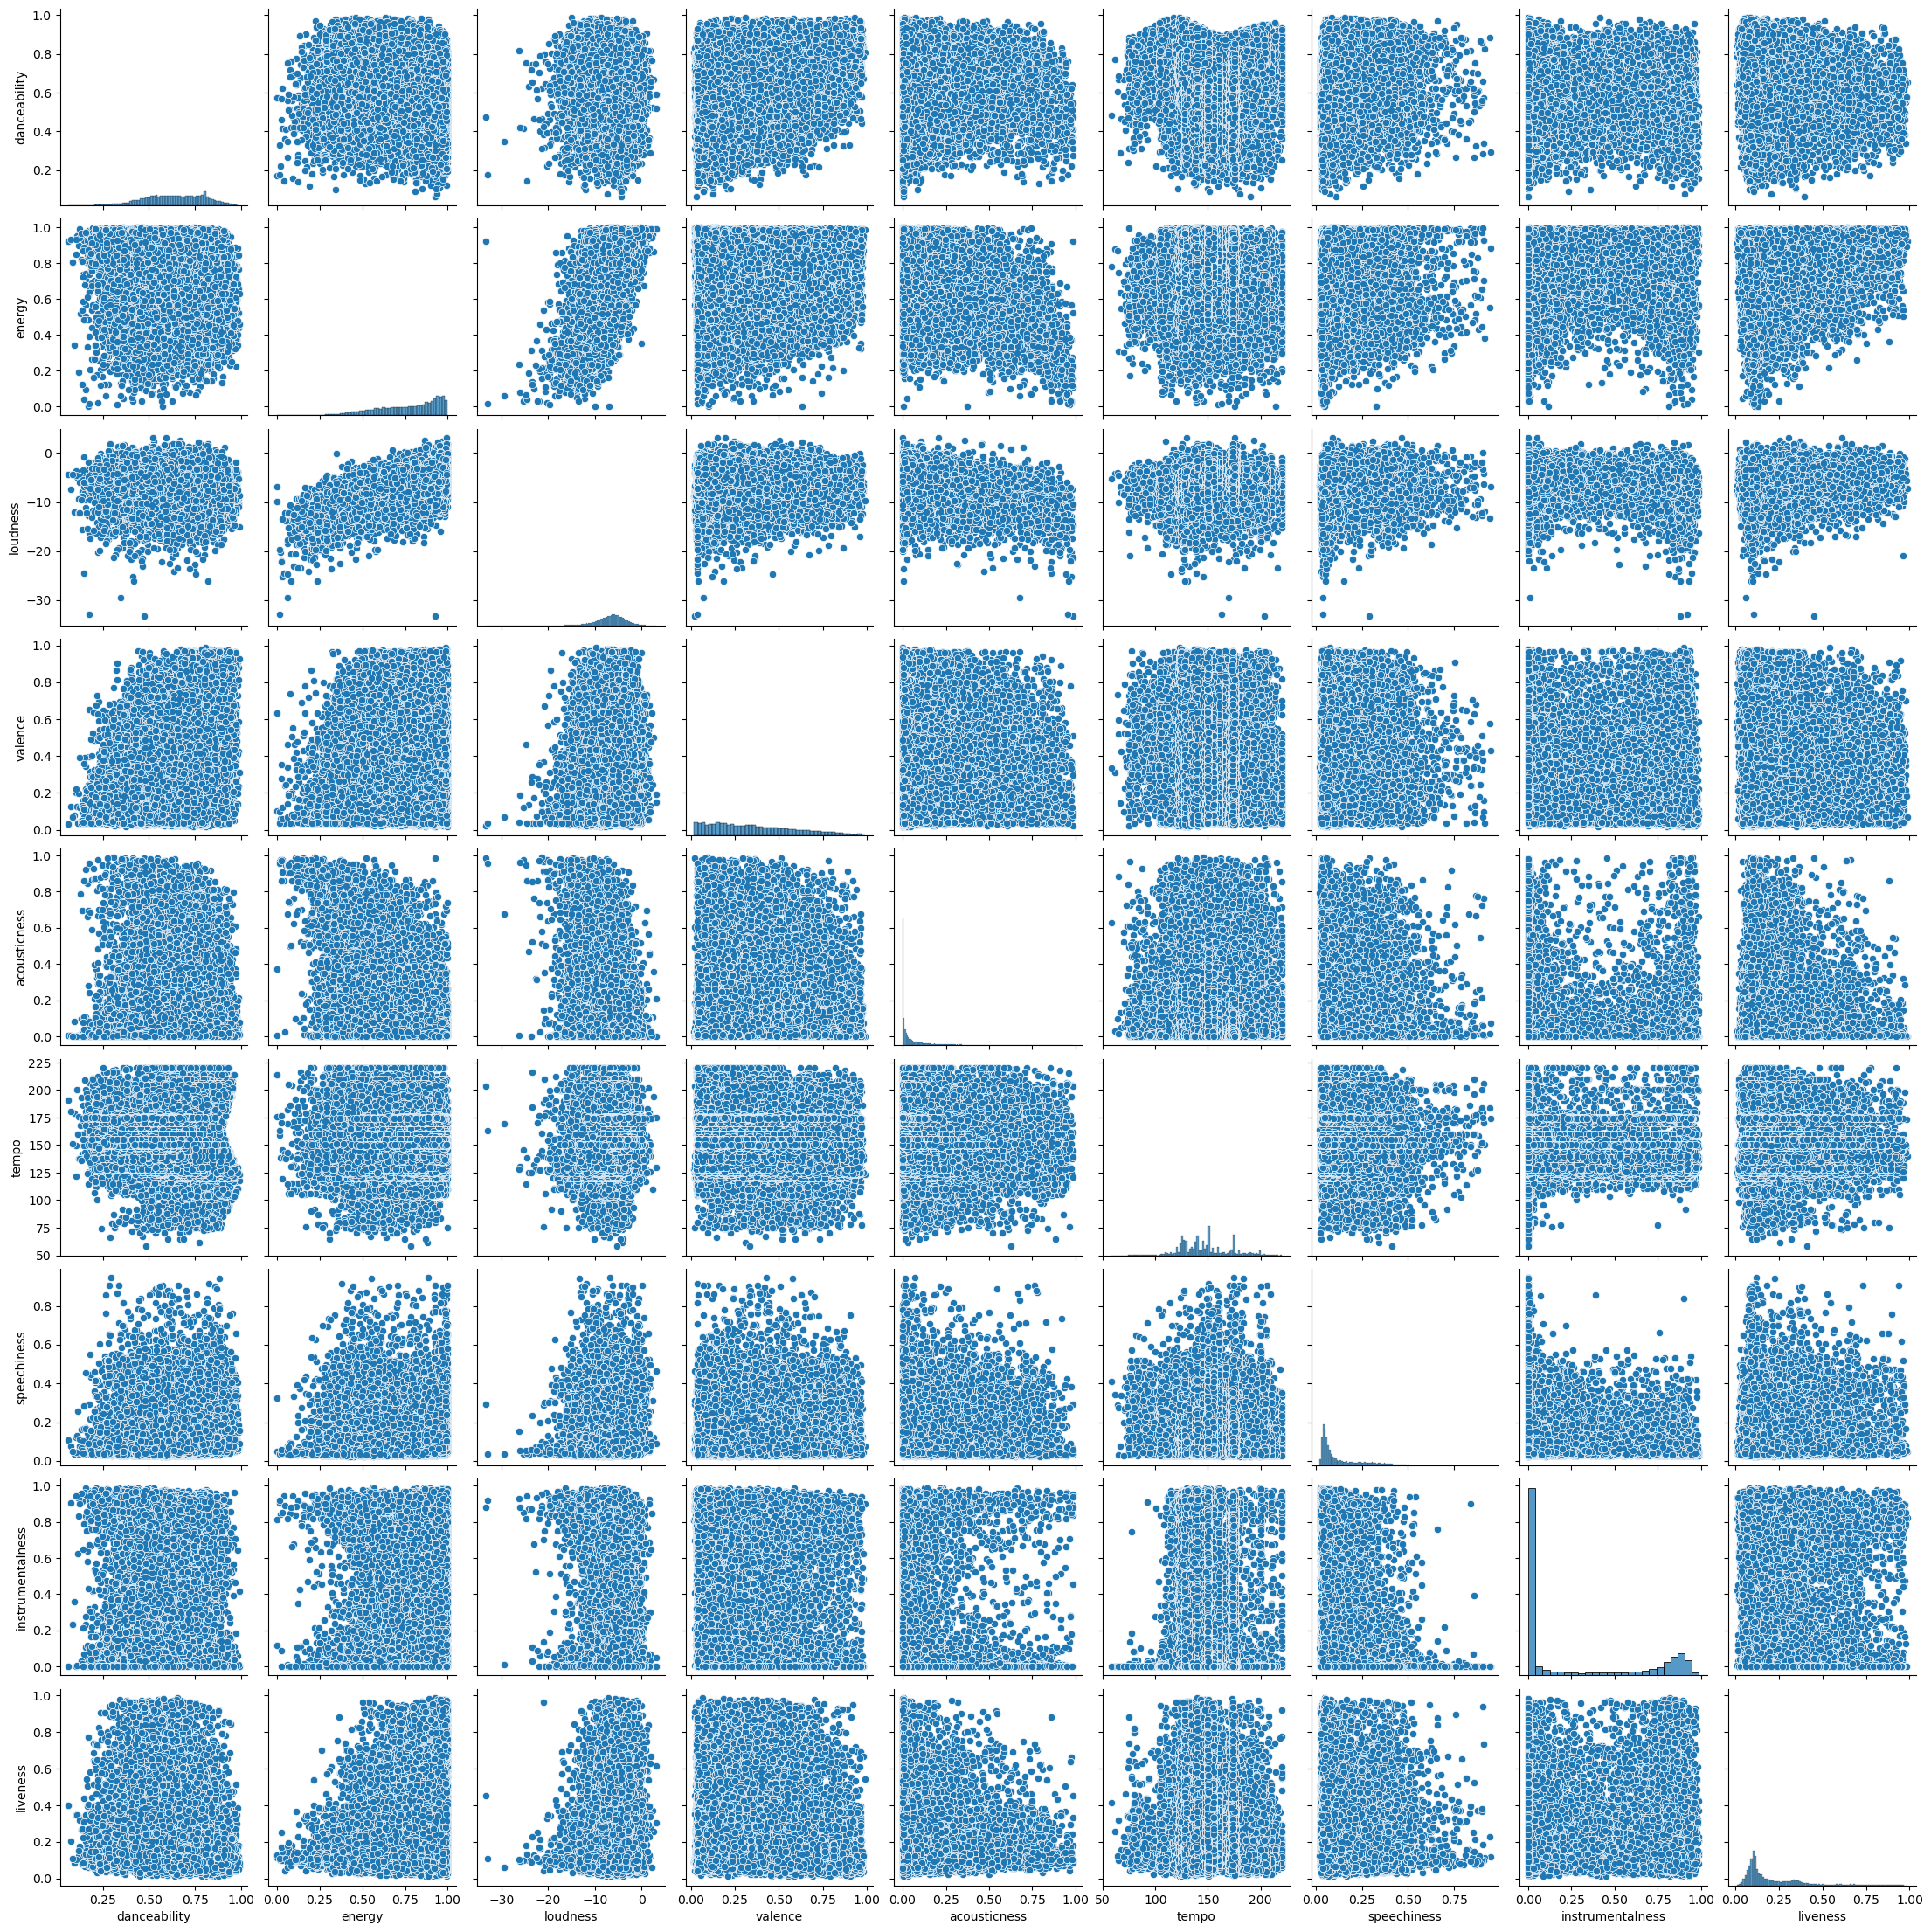

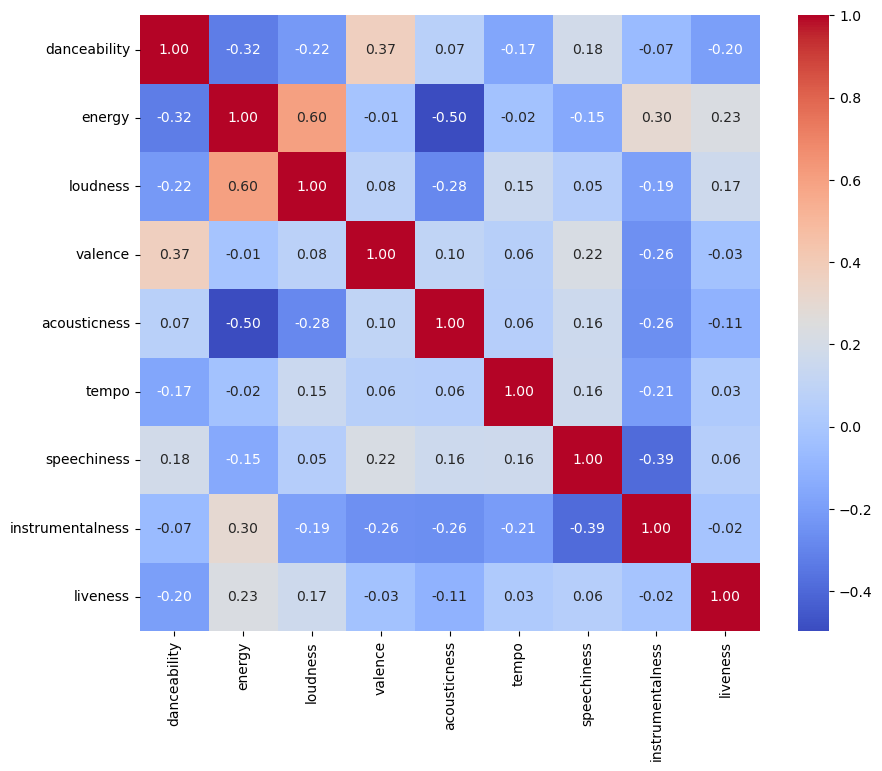

In [5]:
#create pair plot
sns.pairplot(subset)
plt.show()

# Create Heat Map
corr_matrix = subset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Show the heatmap
plt.show()

In [6]:
# Create the 3D scatter plot
fig_3d = px.scatter_3d(df, x='danceability', y='energy', z='loudness',
                       color='genre', title='3D Scatter Plot of Songs',
                       labels={'danceability': 'Danceability', 'energy': 'Energy', 'loudness': 'Loudness'})

# Show the figure
fig_3d.show()


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

In [8]:
data_cleaned = df.select_dtypes(include=[np.number]).dropna()
le = LabelEncoder()
data_cleaned['genre_encoded'] = le.fit_transform(df['genre'].dropna())

# Separating features and target variable
X = data_cleaned.drop(['genre_encoded'], axis=1)
y = data_cleaned['genre_encoded']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Getting the feature importances
feature_importances = rf.feature_importances_

# Creating a DataFrame for better visualization of feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df.sort_values(by='Importance', ascending=False, inplace=True)
features_df.reset_index(drop=True, inplace=True)

features_df.head()  # Displaying the top features

Feature  Importance
0             tempo    0.216541
1       duration_ms    0.123971
2      danceability    0.096696
3  instrumentalness    0.095845
4          loudness    0.083637

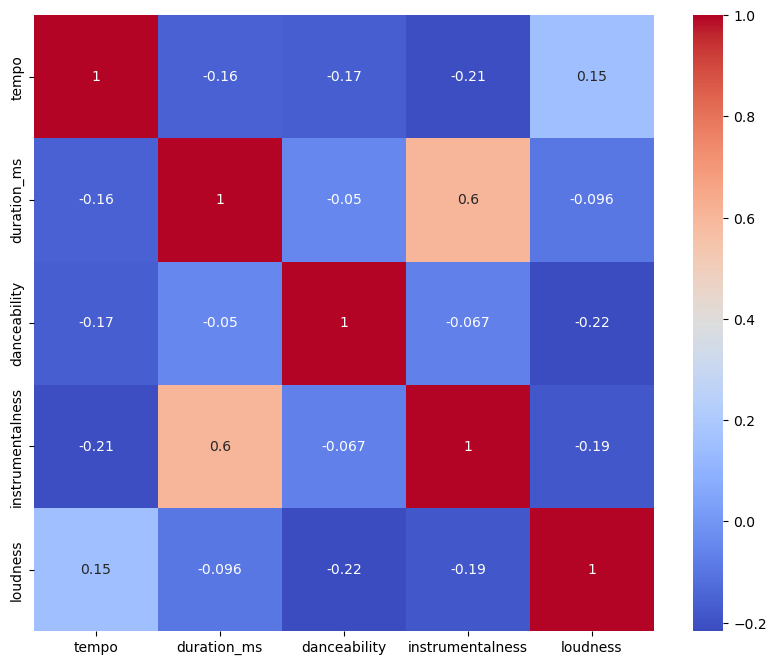

In [9]:
# since the five most important features are tempo, duration, danceability, instrumentalness, and loudness, we can see how they correlate in the dataset
# Create a new DataFrame with only the five most important features
top_features = df[['tempo', 'duration_ms', 'danceability', 'instrumentalness', 'loudness']]
top_features.head()

#plot the features 
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(top_features.corr(), annot=True, cmap='coolwarm')
plt.show()


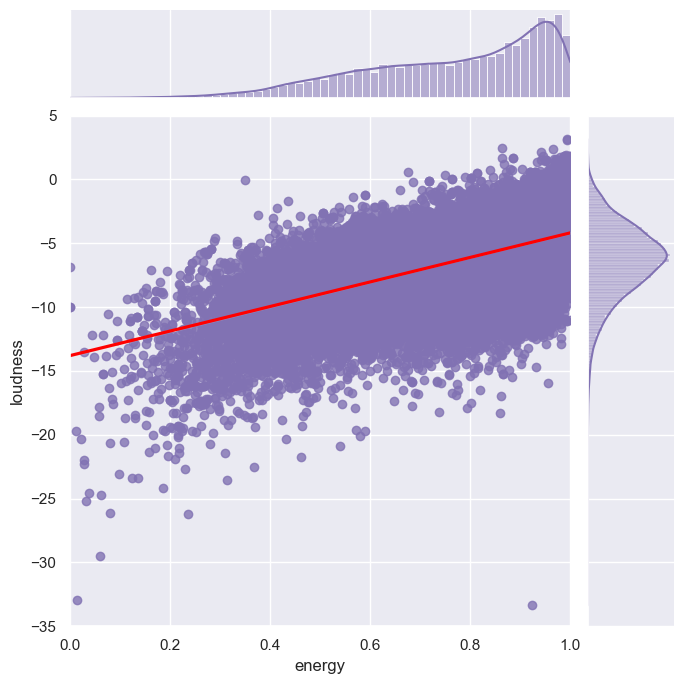

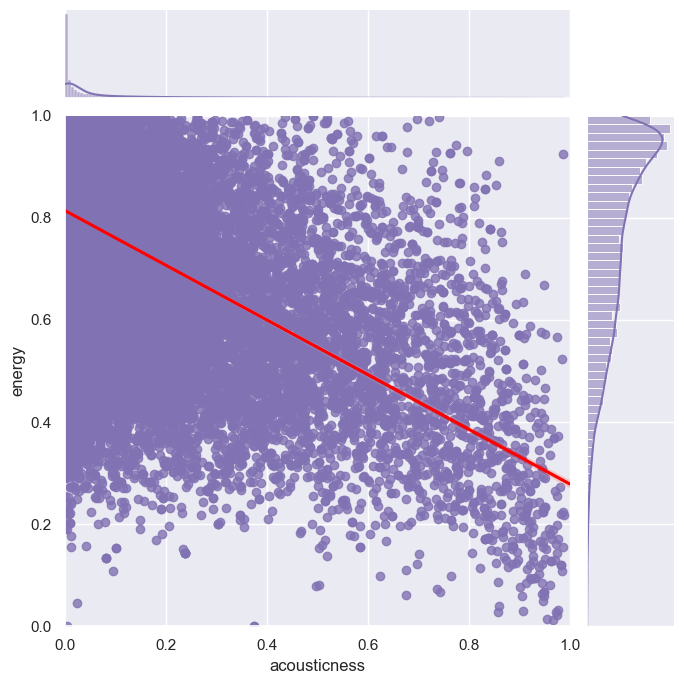

In [10]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="energy", y="loudness", xlim=(0, 1), ylim=(-35, 5), data=subset, line_kws={'color': 'red'}, kind="reg", truncate=False, color="m", height=7)
g1 = sns.jointplot(x="acousticness", y="energy", xlim=(0, 1), ylim=(0, 1), data=subset, line_kws={'color': 'red'}, kind="reg", truncate=False, color="m", height=7)

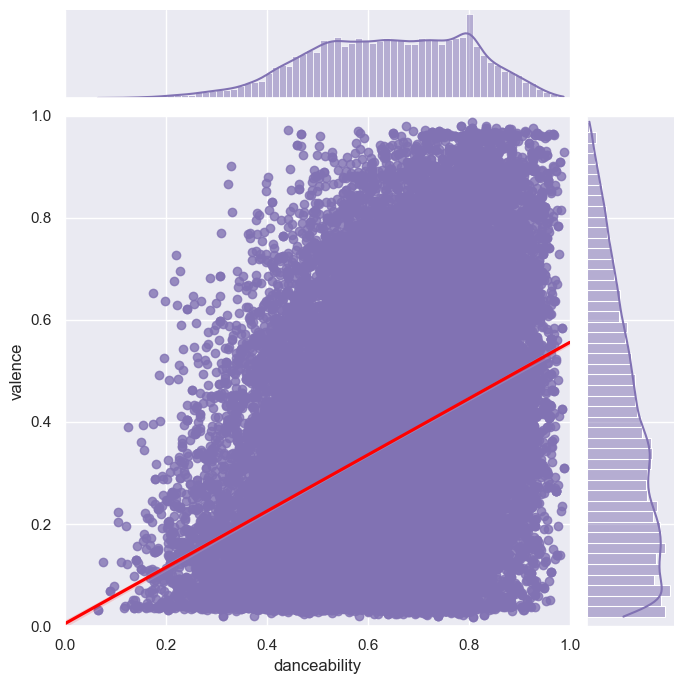

In [11]:
g2 = sns.jointplot(x="danceability", y="valence", xlim=(0, 1), ylim=(0, 1), data=subset, line_kws={'color': 'red'}, kind="reg", truncate=False, color="m", height=7)